<h3><font color = "Blue"> About Boston housing dataset</font> : 
The Boston Housing Dataset consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes</h3>

<h3><font color = "Blue"> Objective</font>: Implement Stochastic Gradient Descent in Simple linear regression and Compare the result with the Linear Regression model.</h3>

###  -------------Importing Packages---------------

In [226]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
%matplotlib inline
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
style.use('fivethirtyeight')

### ----------------Loading data--------------------

In [2]:
from sklearn.datasets import load_boston
boston=pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
Y=load_boston().target
X=load_boston().data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [3]:
print(boston.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


### ----------------Scaling the numerical values------------------

In [4]:
#Scaling x_train and x_test
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [5]:
#Making train_data dataframe and adding price column in it
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,1.420319,-0.493348,1.014262,-0.26968,1.223422,-0.576056,0.950326,-0.958916,1.643194,1.508549,0.768330,0.42063,0.530882,12.7
1,-0.424228,-0.493348,-0.552245,-0.26968,-0.529200,0.196078,-0.972712,0.415960,-0.522615,-0.710194,0.483376,0.42063,-0.913349,25.0
2,0.107982,-0.493348,1.230533,-0.26968,2.783255,-1.188792,1.136995,-1.132144,-0.522615,-0.031107,-1.843751,0.42063,1.952525,15.6


### -------------Hyperparameter tuning using GridSearchCV: To find the best learning rate and regularizer-----------------

In [232]:
# Create logistic regression
sgdreg = linear_model.SGDRegressor()
penalty = ['l1', 'l2']
alphas = [10,5,2.5,1.25,0.62,0.31,0.15,0.075,0.037,0.015,0.001,0.0001]
hyperparameters = dict(alpha=alphas, penalty=penalty)
clf = GridSearchCV(sgdreg, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(x_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best learning rate:', best_model.best_estimator_.get_params()['alpha'])


Best Penalty: l2
Best learning rate: 0.015


<h3><font color = "Blue"> Model 1: SGD Implementation for Linear Regression </font></h3>

In [233]:
# implemented SGD Classifier
from random import sample
def sgd_lr_reg(train_data,learning_rate=0.015,iterations=100,k=10):
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    for j in range(iterations):
        w_old=w
        b_old=b
        w_opt=np.zeros(shape=(1,train_data.shape[1]-1))
        b_opt=0
        temp=train_data.sample(k)
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        for i in range(k):
            w_opt+=x[i]*(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
            b_opt+=(y[i]-(np.dot(w_old,x[i])+b_old))*(-2/k)
        w=w_old-learning_rate*w_opt
        b=b_old-learning_rate*b_opt
        if(w_old==w).all():
            break
    return w,b

In [234]:
def to_predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [235]:
w,b =sgd_lr_reg(train_data,learning_rate=0.01, iterations=100,k=10)

In [236]:
x_test.shape

(152, 13)

In [237]:
y_pred=to_predict(x_test,w,b)

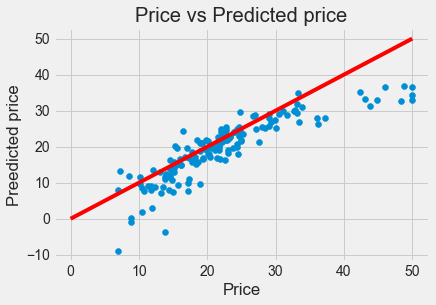

In [238]:
plt.scatter(y_test, y_pred)
plt.plot([0,50],[0,50],'r-')
plt.xlabel("Price")
plt.ylabel("Preedicted price")
plt.title("Price vs Predicted price")
plt.show()

#### Visulaizing the error for model 1

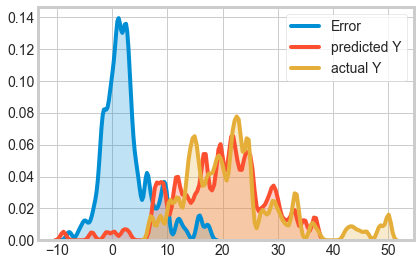

In [239]:
delta_y =  y_test - y_pred
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),shade=True, bw = 0.5, label="Error")
sns.kdeplot(np.array(y_pred), bw = 0.5,shade=True, label="predicted Y")
sns.kdeplot(np.array(y_test), bw = 0.5,shade=True, label="actual Y")
plt.legend()
plt.show()

<h3><font color = "Blue"> Model 2: Simple Linear Regression </font></h3>

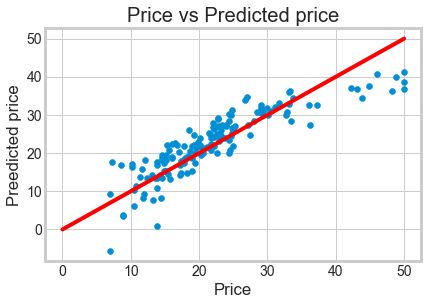

In [240]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

plt.scatter(y_test, y_pred)
plt.plot([0,50],[0,50],'r-')
plt.xlabel("Price")
plt.ylabel("Preedicted price")
plt.title("Price vs Predicted price")
plt.show()

#### Visuallizing error for model 2

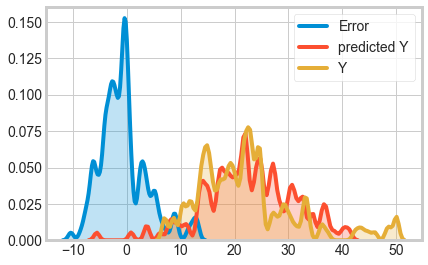

In [241]:
delta_y =  y_test - y_pred
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),shade=True, bw = 0.5, label="Error")
sns.kdeplot(np.array(y_pred),shade=True, bw = 0.5, label="predicted Y")
sns.kdeplot(np.array(y_test),shade=True, bw = 0.5, label="Y")
plt.legend()
plt.show()

 <h3><font color = "Blue"> Model 3: SGD Sklearn implementation</font></h3>

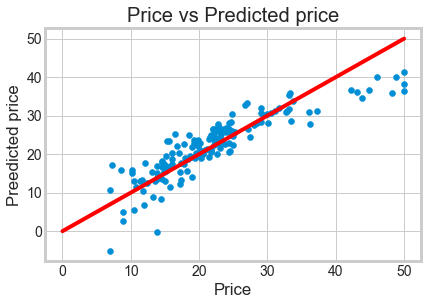

In [242]:
from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

plt.scatter(y_test, y_pred)
plt.plot([0,50],[0,50],'r-')
plt.xlabel("Price")
plt.ylabel("Preedicted price")
plt.title("Price vs Predicted price")
plt.show()

#### Visualizing error for model 3

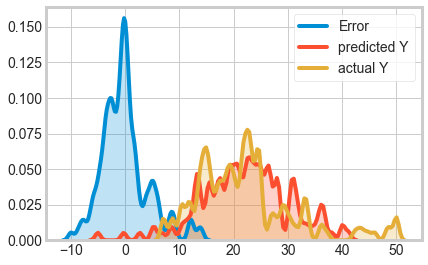

In [243]:
delta_y =  y_test - y_pred
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),shade=True, bw = 0.5, label="Error")
sns.kdeplot(np.array(y_pred), bw = 0.5,shade=True, label="predicted Y")
sns.kdeplot(np.array(y_test), bw = 0.5,shade=True, label="actual Y")
plt.legend()
plt.show()

# Conclusion:
1. The regression model is implemented in three different ways
       a. Using own SGD function - Model1
       b. By Simple linear regression - model2
       c. By Sklearn SGDRegressor - Model3
2. All the three model gives the same result.
2. Best learning rate is 0.015.
3. Errors in all the three implementations are zero centered.